
# Aim
**To Analyze airbnb and short term rental dataset provided is to help investors avoid overspending and purchasing properties for short-term rentals (STR) that are not profitable inorder to help ,minimize potential losses.**
# Content:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

<a id='1'></a>
# 📖 Load the Data
---

In [2]:
bnb_data = pd.read_csv('Aemf1.csv')

In [3]:
bnb_data.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [4]:
bnb_data['City'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64

<a id='2'></a>
# Variable Description
---

 <font color='purple'>

* City: Name of the city
    
* Price: Price of Airbnb in dollars.

* Day: If it is weekday or weekend.
    
* Room Type: Type or Airbnb - Entire Apt, Private Room, Shared Room.                 
* Shared Room: If the Room in Airbnb is shared by anyone
    
* Private Room: If the stay has the private room available.

* Person Capacity: The Person Capacity of Airbnb

* Superhost: If the Airbnb host is Superhost or not

* Multiple Rooms:If the Airbnb has multiple rooms(2-4)rooms
    
* Business: If the Business has more than 4 offers                       0
    
* Cleanliness Rating             0
    
* Guest Satisfaction             0
    
* Bedrooms                       0
    
* City Center (km)               0
    
* Metro Distance (km)            0
    
* Attraction Index: measurement used to evaluate the attractiveness of a particular place or location.
    
* Normalised Attraction Index    0
    
* Restraunt Index                0
    
* Normalised Restraunt Index   

### About the Data

In [5]:
#The dataset consist of Nine european cities each being

# 🔍  Data Inspection

In [6]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [7]:
bnb_data.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [8]:
bnb_data.shape

(41714, 19)

### Check null values

In [9]:
bnb_data.isnull().sum() #check for null values

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

No null values

In [10]:
bnb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
Person Capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
Multiple Rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
Business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000
Bedrooms,41714.0,1.165939,0.638157,0.000000,1.000000,1.000000,1.000000,10.000000
City Center (km),41714.0,2.679792,1.996684,0.015045,1.275913,2.253237,3.584489,25.284557
Metro Distance (km),41714.0,0.603921,0.706206,0.002301,0.236693,0.391220,0.678702,14.273577
Attraction Index,41714.0,293.905990,235.750055,15.152201,124.371614,228.920599,394.000201,4513.563486


### Changing bool columns to int

In [11]:
bnb_data['Shared Room'] = bnb_data['Shared Room'].astype(int)
bnb_data['Private Room'] = bnb_data['Private Room'].astype(int)
bnb_data['Superhost'] = bnb_data['Superhost'].astype(int)

In [12]:
bnb_data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,0,0,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,0,0,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


### Viewing price outliers

<AxesSubplot:xlabel='Price'>

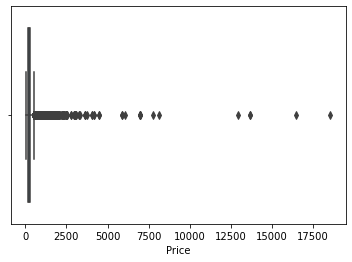

In [13]:
sns.boxplot(bnb_data['Price'])

### Removing possible outliers in columns

In [14]:
col_outlier = ['Price', 'City Center (km)', 'Metro Distance (km)',
               'Attraction Index', 'Normalised Attraction Index',
               'Restraunt Index', 'Normalised Restraunt Index']

In [15]:
for col in col_outlier:
    Q1 = bnb_data[col].quantile(0.25)
    Q3 = bnb_data[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7

    bnb_data = bnb_data[(bnb_data[col] >= limit_low) & (bnb_data[col] <= limit_high)]

In [16]:
cols = [ 'Price',  'Person Capacity',  'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index']

bnb_data[cols].var()

Price                           10435.086523
Person Capacity                     1.625895
Multiple Rooms                      0.208957
Business                            0.225638
Cleanliness Rating                  0.796142
Guest Satisfaction                 65.923574
Bedrooms                            0.374267
City Center (km)                    2.344658
Metro Distance (km)                 0.079469
Attraction Index                25742.402055
Normalised Attraction Index        35.803754
Restraunt Index                152236.845911
Normalised Restraunt Index        266.455482
dtype: float64

In [17]:
bnb_data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
3,Amsterdam,433.529398,Weekday,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
6,Amsterdam,215.124317,Weekday,Private room,0,1,2.0,0,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,Amsterdam,276.521454,Weekday,Private room,0,1,2.0,0,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
13,Amsterdam,552.808567,Weekday,Entire home/apt,0,0,2.0,1,0,0,10.0,100.0,1,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41704,Vienna,463.501858,Weekend,Entire home/apt,0,0,5.0,0,1,0,10.0,90.0,2,1.021878,0.285141,176.754900,12.658020,283.426459,6.850308
41707,Vienna,115.933899,Weekend,Private room,0,1,4.0,0,1,0,9.0,94.0,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797
41710,Vienna,304.793960,Weekend,Entire home/apt,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41712,Vienna,301.054157,Weekend,Private room,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


#

# 📊 Exploratory Data Analysis
---
The purpose of this section is to decide the variables that will be well suited for predicting properties with the best price

First lets look at each

### City count

Text(0.5, 1.0, 'City with highest number of properties ')

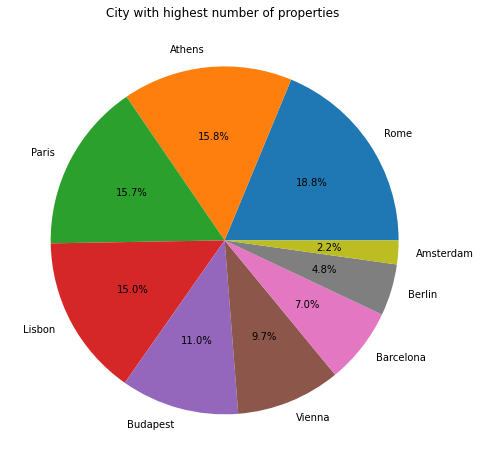

In [18]:
plt.figure(figsize=(8,8))
city_counts = bnb_data['City'].value_counts()
plt.pie(city_counts, labels = city_counts.index, autopct='%1.1f%%')
plt.title('City with highest number of properties ')

From the above Rome has the highest number of properties with Amsterdam having the least number of properties.

If Amsterdam has less properties it may also be that Amsterdam has the most highly priced properties due to high demand and less supply
Lets confirm our thesis...

### Cities with the highest priced properties

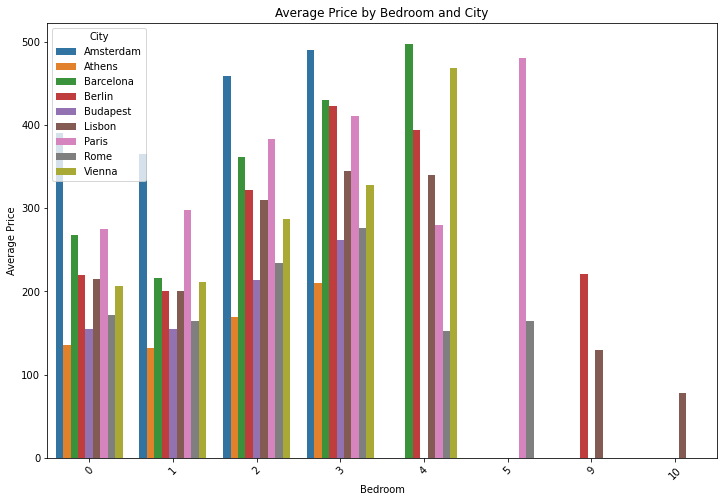

In [19]:
# Calculate and visualize the average price by 'Room Type' and 'City'
avg_price_by_room_city = bnb_data.groupby(['Bedrooms', 'City'])['Price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_by_room_city, x='Bedrooms', y='Price', hue='City')
plt.title('Average Price by Bedroom and City')
plt.xlabel('Bedroom')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

From the above charts we can see that Amsterdam has the highest price for 3 bedroom, 2 bedroom and 1 bedroom which confirms our thesis.
When purchasing a property for short term rental or sublease
It has to have a high or moderate cleanliness rating, Guest Satisfaction, a good person capacity and Attraction Index or wether the property is managed by a superhost.
Lets look at their relationship with 'Price'

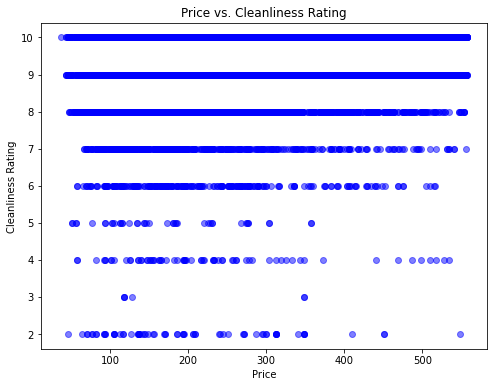

In [20]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(bnb_data['Price'], bnb_data['Cleanliness Rating'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Cleanliness Rating')
plt.title('Price vs. Cleanliness Rating')

# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

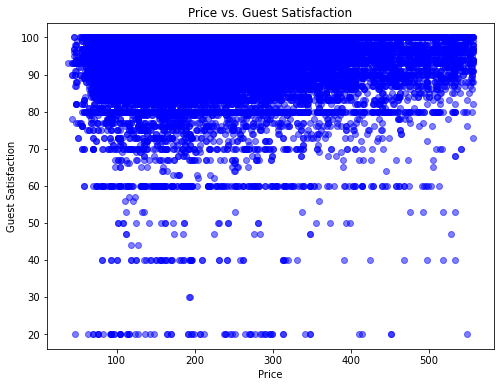

In [21]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(bnb_data['Price'], bnb_data['Guest Satisfaction'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Guest Satisfaction')
plt.title('Price vs. Guest Satisfaction')

# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

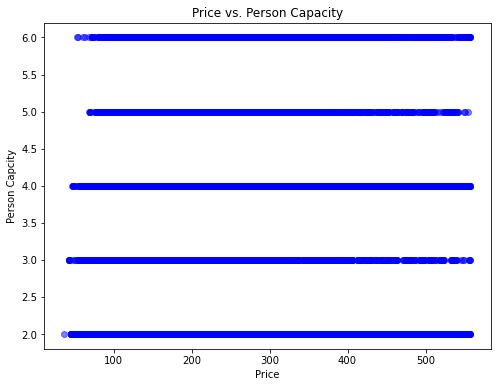

In [22]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(bnb_data['Price'], bnb_data['Person Capacity'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Person Capcity')
plt.title('Price vs. Person Capacity')

# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

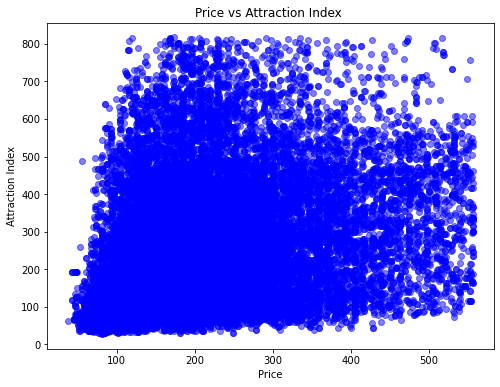

In [23]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(bnb_data['Price'], bnb_data['Attraction Index'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Attraction Index')
plt.title('Price vs Attraction Index ')

# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

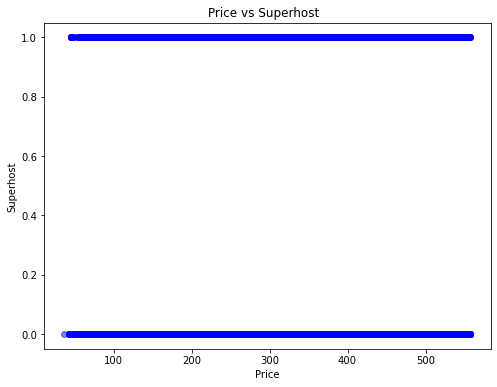

In [24]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(bnb_data['Price'], bnb_data['Superhost'], c='blue', marker='o', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Superhost')
plt.title('Price vs Superhost  ')

# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

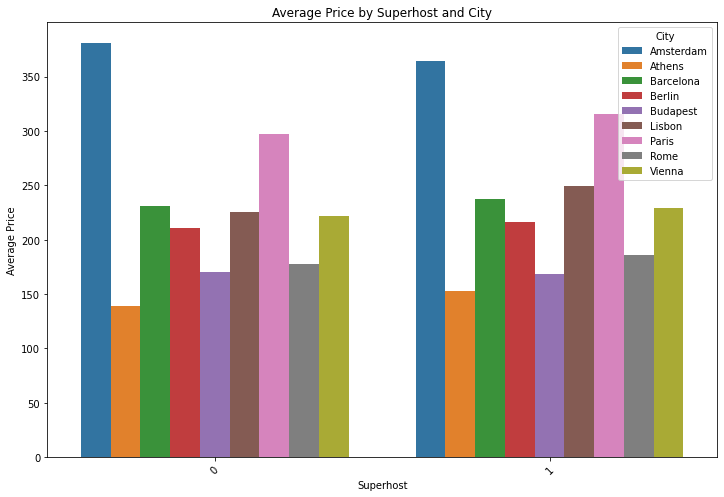

In [25]:
# Calculate and visualize the average price by 'Room Type' and 'City'
avg_price_by_room_city = bnb_data.groupby(['Superhost', 'City'])['Price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_by_room_city, x='Superhost', y='Price', hue='City')
plt.title('Average Price by Superhost and City')
plt.xlabel('Superhost')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

From the above we can see that there is little or no difference between the Properties managed by superhost and the ones not managed by superhost

In [26]:
bnb_data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
3,Amsterdam,433.529398,Weekday,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
6,Amsterdam,215.124317,Weekday,Private room,0,1,2.0,0,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,Amsterdam,276.521454,Weekday,Private room,0,1,2.0,0,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
13,Amsterdam,552.808567,Weekday,Entire home/apt,0,0,2.0,1,0,0,10.0,100.0,1,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41704,Vienna,463.501858,Weekend,Entire home/apt,0,0,5.0,0,1,0,10.0,90.0,2,1.021878,0.285141,176.754900,12.658020,283.426459,6.850308
41707,Vienna,115.933899,Weekend,Private room,0,1,4.0,0,1,0,9.0,94.0,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797
41710,Vienna,304.793960,Weekend,Entire home/apt,0,0,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41712,Vienna,301.054157,Weekend,Private room,0,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


Text(0, 0.5, 'Quantity')

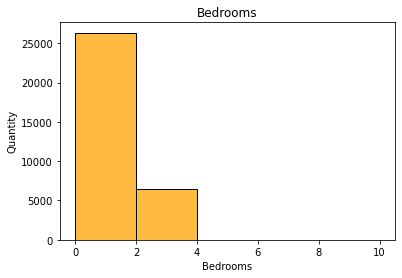

In [27]:
sns.histplot(data = bnb_data, x = 'Bedrooms', bins = 5, color='orange', alpha=0.75)
plt.title('Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Quantity')

### Price by City

Text(0, 0.5, 'Count')

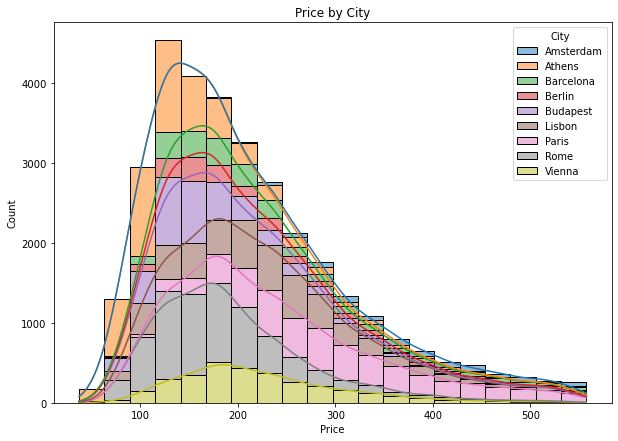

In [28]:
plt.figure(figsize = (10, 7))
sns.histplot(data = bnb_data, x = 'Price', hue = 'City', bins = 20, multiple = 'stack', kde = True)

plt.title('Price by City')
plt.xlabel('Price')
plt.ylabel('Count')

**Summary:** This plot allows us to compare and analyze the price distribution for various cities, making it useful for understanding how prices are distributed and potentially identifying any patterns or differences between the cities.

<AxesSubplot:>

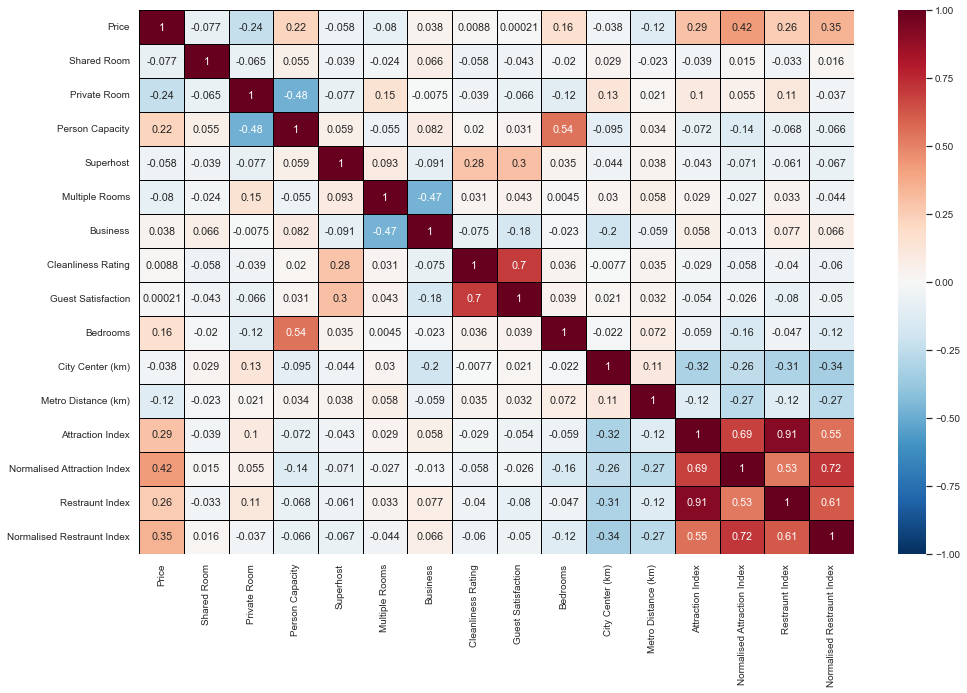

In [29]:
sns.set(font_scale=0.9)
plt.figure(figsize=(16,10))
sns.heatmap(
    bnb_data.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='black',
    square=False,)

<font color='red'>
    
<a id='6'></a>
# What I Wonder in the dataset

<font color='red'>
    
<a id='6.1'></a>
### In What city has the highest number of property

In [30]:
# no null values

In [31]:
#Number of cities and how many properties there are in each

city_num = bnb_data.iloc[0:41714, 0] #displays only shared room column

city_num_list = list(city_num)

from collections import Counter

city_count = Counter(city_num_list)

for z, count in city_count.items(): #print item occurences
    print(f"{z}: {count}")

Amsterdam: 727
Athens: 5178
Barcelona: 2307
Berlin: 1573
Budapest: 3600
Lisbon: 4917
Paris: 5159
Rome: 6151
Vienna: 3183


<font color='green'>  
Rome has the highest number of properties

<font color='red'>  
Hmmm...
    why is that ?

#

### Price: This is the price of rent for a property in US dollars ($)

### Distribution of property Prices in the Dataset

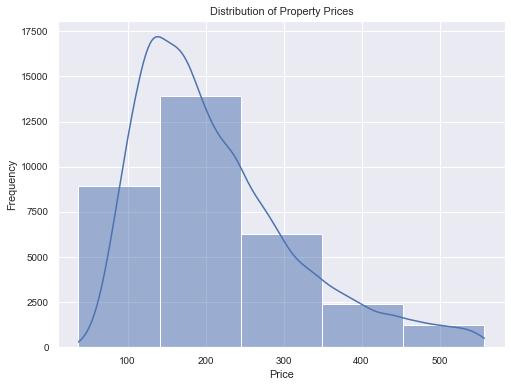

In [32]:
# Visualize the distribution of 'Price'
plt.figure(figsize=(8, 6))
sns.histplot(bnb_data['Price'], bins=5, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

From the above plot we can see that most prices of houses fall under $2000

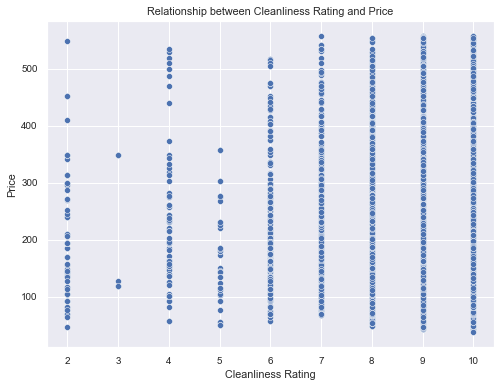

In [33]:
# Visualize the relationship between 'Price' and 'Cleanliness Rating'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=bnb_data, x='Cleanliness Rating', y='Price')
plt.title('Relationship between Cleanliness Rating and Price')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Price')
plt.show()

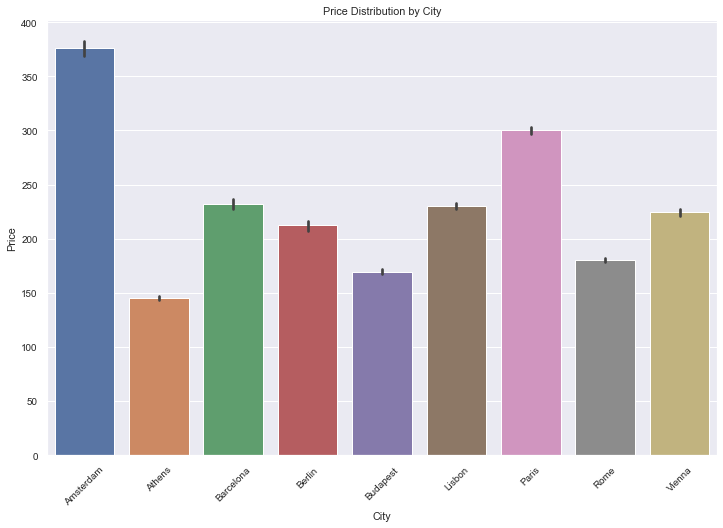

In [34]:
# Visualize the relationship between 'Price' and 'City'
plt.figure(figsize=(12, 8))
sns.barplot(data=bnb_data, x='City', y='Price')
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Price Vs Person Capacity

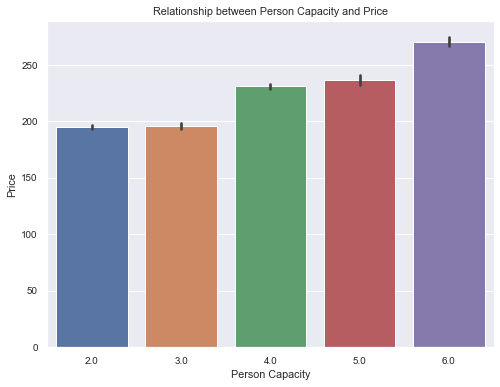

In [35]:
# Visualize the relationship between 'Price' and 'Person Capacity'
plt.figure(figsize=(8, 6))
sns.barplot(data=bnb_data, x='Person Capacity', y='Price')
plt.title('Relationship between Person Capacity and Price')
plt.xlabel('Person Capacity')
plt.ylabel('Price')
plt.show()

### Correlation

In [36]:
#Delete categorical variables
columns_to_delete = ['City', 'Day', 'Room Type']
bnb_corr = bnb_data.drop(columns_to_delete, axis=1)

In [37]:
bnb_corr.corr()

,Price,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
Price,1.000000,-0.076768,-0.236641,0.223583,-0.057649,-0.079555,0.037516,0.008792,0.000207,0.163053,-0.038348,-0.119037,0.289584,0.422646,0.257689,0.345674
Shared Room,-0.076768,1.000000,-0.064776,0.054910,-0.039292,-0.023887,0.066375,-0.058269,-0.042638,-0.019768,0.029254,-0.023312,-0.038880,0.014939,-0.032827,0.015708
Private Room,-0.236641,-0.064776,1.000000,-0.479476,-0.077425,0.145325,-0.007451,-0.039251,-0.066225,-0.116455,0.127363,0.020998,0.100298,0.054620,0.111351,-0.036973
Person Capacity,0.223583,0.054910,-0.479476,1.000000,0.059075,-0.055291,0.081613,0.019882,0.030740,0.539725,-0.094980,0.033946,-0.072238,-0.135929,-0.067769,-0.065913
Superhost,-0.057649,-0.039292,-0.077425,0.059075,1.000000,0.092671,-0.090988,0.284734,0.298943,0.034942,-0.043599,0.037531,-0.042897,-0.071294,-0.060999,-0.066685
Multiple Rooms,-0.079555,-0.023887,0.145325,-0.055291,0.092671,1.000000,-0.471014,0.031241,0.042553,0.004547,0.029766,0.057689,0.029111,-0.026598,0.032793,-0.043775
Business,0.037516,0.066375,-0.007451,0.081613,-0.090988,-0.471014,1.000000,-0.074624,-0.176380,-0.022726,-0.198471,-0.058755,0.058452,-0.013497,0.076854,0.066282
Cleanliness Rating,0.008792,-0.058269,-0.039251,0.019882,0.284734,0.031241,-0.074624,1.000000,0.698059,0.035603,-0.007693,0.034596,-0.029073,-0.057649,-0.039729,-0.060026
Guest Satisfaction,0.000207,-0.042638,-0.066225,0.030740,0.298943,0.042553,-0.176380,0.698059,1.000000,0.039404,0.020578,0.032274,-0.054153,-0.026102,-0.079521,-0.050328
Bedrooms,0.163053,-0.019768,-0.116455,0.539725,0.034942,0.004547,-0.022726,0.035603,0.039404,1.000000,-0.021799,0.071674,-0.059010,-0.163965,-0.046526,-0.118912


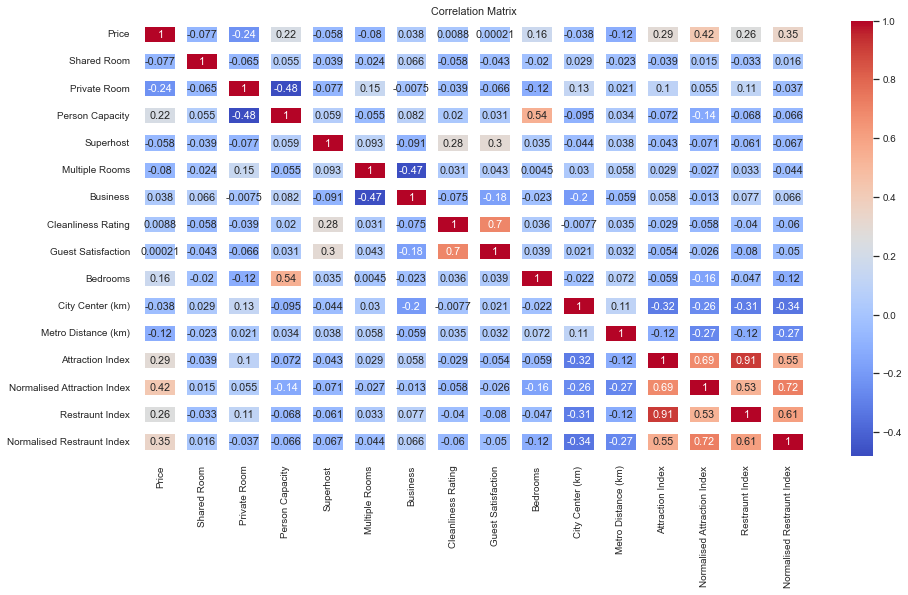

In [38]:
bnb_corr.corr()
plt.figure(figsize=(15,8))
sns.heatmap(bnb_corr.corr(), annot=True,linewidths=10.2, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the above is the correlation matrix

In [39]:
bnb_data.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
3,Amsterdam,433.529398,Weekday,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
6,Amsterdam,215.124317,Weekday,Private room,0,1,2.0,0,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,Amsterdam,276.521454,Weekday,Private room,0,1,2.0,0,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
13,Amsterdam,552.808567,Weekday,Entire home/apt,0,0,2.0,1,0,0,10.0,100.0,1,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314


# Machine Learning

##### We want to predict the Optimal Pricing for the airbnb property so we split the dataset into features and target, but at the same time we have both categorical and numerical values, we can encode the categorical values

In [40]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32795 entries, 3 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         32795 non-null  object 
 1   Price                        32795 non-null  float64
 2   Day                          32795 non-null  object 
 3   Room Type                    32795 non-null  object 
 4   Shared Room                  32795 non-null  int32  
 5   Private Room                 32795 non-null  int32  
 6   Person Capacity              32795 non-null  float64
 7   Superhost                    32795 non-null  int32  
 8   Multiple Rooms               32795 non-null  int64  
 9   Business                     32795 non-null  int64  
 10  Cleanliness Rating           32795 non-null  float64
 11  Guest Satisfaction           32795 non-null  float64
 12  Bedrooms                     32795 non-null  int64  
 13  City Center (km)

The City column and Day and Room Type columns are the categorical column, we can go ahead and perform the encoding operations on them

## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder=LabelEncoder()

In [43]:
bnb_data['City'].value_counts()

Rome         6151
Athens       5178
Paris        5159
Lisbon       4917
Budapest     3600
Vienna       3183
Barcelona    2307
Berlin       1573
Amsterdam     727
Name: City, dtype: int64

In [44]:
#View the categorical columns

city=bnb_data['City'].unique()
day=bnb_data['Day'].unique()
rm_type=bnb_data['Room Type'].unique()

In [45]:
print('city:',city)
print("day: ",day)
print("Room Type: ",rm_type)

city: ['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']
day:  ['Weekday' 'Weekend']
Room Type:  ['Private room' 'Entire home/apt' 'Shared room']


In [46]:
#Encode the catgorical columns

bnb_data['City']=encoder.fit_transform(bnb_data['City'])

bnb_data['Day']=encoder.fit_transform(bnb_data['Day'])

bnb_data['Room Type']=encoder.fit_transform(bnb_data['Room Type'])

In [47]:
#Convert the person capacity column to int

bnb_data['Person Capacity']=bnb_data['Person Capacity'].astype('int')

In [48]:
bnb_data

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
3,0,433.529398,0,1,0,1,4,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,1,0,1,2,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
6,0,215.124317,0,1,0,1,2,0,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,0,276.521454,0,1,0,1,2,0,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
13,0,552.808567,0,0,0,0,2,1,0,0,10.0,100.0,1,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41704,8,463.501858,1,0,0,0,5,0,1,0,10.0,90.0,2,1.021878,0.285141,176.754900,12.658020,283.426459,6.850308
41707,8,115.933899,1,1,0,1,4,0,1,0,9.0,94.0,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797
41710,8,304.793960,1,0,0,0,2,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41712,8,301.054157,1,1,0,1,2,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


## Feature Engineering

In [49]:
#Splitting the dataset into features and target

X=bnb_data.drop(columns='Price')
y=bnb_data['Price']

In [50]:
#display features

X

,City,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
3,0,0,1,0,1,4,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,0,1,0,1,2,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
6,0,0,1,0,1,2,0,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
9,0,0,1,0,1,2,0,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478
13,0,0,0,0,0,2,1,0,0,10.0,100.0,1,1.305494,1.342162,325.255952,17.222519,390.912052,27.239314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41704,8,1,0,0,0,5,0,1,0,10.0,90.0,2,1.021878,0.285141,176.754900,12.658020,283.426459,6.850308
41707,8,1,1,0,1,4,0,1,0,9.0,94.0,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797
41710,8,1,0,0,0,2,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41712,8,1,1,0,1,2,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [51]:
#display target
y

3        433.529398
4        485.552926
6        215.124317
9        276.521454
13       552.808567
            ...    
41704    463.501858
41707    115.933899
41710    304.793960
41712    301.054157
41713    133.230489
Name: Price, Length: 32795, dtype: float64

###### Since it's looking unclear on which features are the best for the best model, we employ the SelectKBest method which serves as a powerful tool for feature selection.We will adopt the chi square and f_regression method as score functions. It allows us to systematically explore and validate which features are 'okay' and 'optimal' for achieving the best results, enabling us to build more accurate and efficient predictive models.

### Chi-Square

In [52]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression

In [53]:
select=SelectKBest(score_func=chi2,k=10)

In [54]:
fit=select.fit(X,y.astype('int'))

In [55]:
fit.scores_

array([6.00852964e+03, 4.76138022e+02, 3.17207363e+03, 1.65229256e+03,
       2.71051204e+03, 1.56139515e+03, 7.25580909e+02, 7.67146380e+02,
       1.23444823e+03, 8.47608526e+01, 7.94326772e+02, 7.01924299e+02,
       1.53560545e+03, 3.36043643e+02, 5.52285759e+05, 2.64561629e+04,
       1.55568913e+06, 6.58797493e+04])

In [56]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [57]:
featurescore=pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns=['Features','Scores']

In [58]:
#select the 10 best features

best_features=featurescore.sort_values(by='Scores',ascending=False).head(10)

In [59]:
print(best_features)

                       Features        Scores
16              Restraunt Index  1.555689e+06
14             Attraction Index  5.522858e+05
17   Normalised Restraunt Index  6.587975e+04
15  Normalised Attraction Index  2.645616e+04
0                          City  6.008530e+03
2                     Room Type  3.172074e+03
4                  Private Room  2.710512e+03
3                   Shared Room  1.652293e+03
5               Person Capacity  1.561395e+03
12             City Center (km)  1.535605e+03


In [60]:
best_features.Features

16                Restraunt Index
14               Attraction Index
17     Normalised Restraunt Index
15    Normalised Attraction Index
0                            City
2                       Room Type
4                    Private Room
3                     Shared Room
5                 Person Capacity
12               City Center (km)
Name: Features, dtype: object

In [61]:
chi_selected_X=bnb_data[["Restraunt Index", "Attraction Index", "Normalised Restraunt Index", "Normalised Attraction Index","City", "Room Type", "Private Room", "Shared Room", "Person Capacity", "City Center (km)"]]

In [62]:
chi_selected_X

,Restraunt Index,Attraction Index,Normalised Restraunt Index,Normalised Attraction Index,City,Room Type,Private Room,Shared Room,Person Capacity,City Center (km)
3,875.033098,493.272534,60.973565,26.119108,0,1,1,0,4,0.384862
4,815.305740,552.830324,56.811677,29.272733,0,1,1,0,2,0.544738
6,242.765524,200.167652,16.916251,10.599010,0,1,1,0,2,1.881092
9,238.291258,206.252862,16.604478,10.921226,0,1,1,0,2,3.142361
13,390.912052,325.255952,27.239314,17.222519,0,0,0,0,2,1.305494
...,...,...,...,...,...,...,...,...,...,...
41704,283.426459,176.754900,6.850308,12.658020,8,0,0,0,5,1.021878
41707,208.517887,109.751387,5.039797,7.859670,8,1,1,0,4,3.041932
41710,342.182813,204.970121,8.270427,14.678608,8,0,0,0,2,0.810205
41712,158.563398,109.236574,3.832416,7.822803,8,1,1,0,2,3.044100


In [108]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(chi_selected_X, y, test_size=0.2, random_state=3)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [110]:
from sklearn.metrics import r2_score

In [111]:
models=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

In [112]:
chi_r2_scores=[]

In [113]:
def chi_comparing_models():
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred=model.predict(X_test)
        
        r2=r2_score(y_test,y_pred)
        chi_r2_scores.append(round(r2*100,3))
        
        print("The R-square value of ",model," is :" ,format(r2*100,'.2f'))

In [114]:
chi_comparing_models()

The R-square value of  LinearRegression()  is : 32.04
The R-square value of  RandomForestRegressor()  is : 72.19
The R-square value of  DecisionTreeRegressor()  is : 57.03
The R-square value of  GradientBoostingRegressor()  is : 58.57
The R-square value of  KNeighborsRegressor()  is : 38.37


In [115]:
chi_data=dict(zip(models,chi_r2_scores))

In [116]:
chi_data

{LinearRegression(): 32.044,
 RandomForestRegressor(): 72.193,
 DecisionTreeRegressor(): 57.026,
 GradientBoostingRegressor(): 58.567,
 KNeighborsRegressor(): 38.373}

In [138]:
chi2_models={"models":['LR','RF','DTR','SVR','KNN'],
       'r2_score': chi_r2_scores
       }

In [139]:
chi_df=pd.DataFrame(chi2_models)

In [147]:
chi_df.sort_values(by='r2_score',ascending=False)

,models,r2_score
1,RF,72.193
3,SVR,58.567
2,DTR,57.026
4,KNN,38.373
0,LR,32.044


### F_regression

In [117]:
select=SelectKBest(score_func=f_regression,k=10)

In [118]:
fit=select.fit(X,y.astype('int'))

In [119]:
fit.scores_

array([5.30256656e+02, 3.05588593e+01, 2.26200515e+03, 1.94479346e+02,
       1.94618130e+03, 1.72570146e+03, 1.09241029e+02, 2.08911560e+02,
       4.62486056e+01, 2.53634368e+00, 1.53365335e-03, 8.95440615e+02,
       4.82986174e+01, 4.71525949e+02, 3.00128540e+03, 7.13238368e+03,
       2.33231984e+03, 4.45191224e+03])

In [120]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [121]:
featurescore=pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns=['Features','Scores']

In [122]:
featurescore

,Features,Scores
0,City,530.256656
1,Day,30.558859
2,Room Type,2262.005154
3,Shared Room,194.479346
4,Private Room,1946.181301
5,Person Capacity,1725.701458
6,Superhost,109.241029
7,Multiple Rooms,208.911560
8,Business,46.248606
9,Cleanliness Rating,2.536344


In [123]:
#select the 10 best features

best_features=featurescore.sort_values(by='Scores',ascending=False).head(10)

In [124]:
selected_features=list(best_features.Features)

In [125]:
best_features.Features

15    Normalised Attraction Index
17     Normalised Restraunt Index
14               Attraction Index
16                Restraunt Index
2                       Room Type
4                    Private Room
5                 Person Capacity
11                       Bedrooms
0                            City
13            Metro Distance (km)
Name: Features, dtype: object

In [126]:
f_reg_selected_X=bnb_data[["City","Restraunt Index", "Attraction Index", "Normalised Restraunt Index", "Normalised Attraction Index", "Room Type", "Private Room", "Metro Distance (km)", "Person Capacity", "Bedrooms"]]

In [127]:
f_reg_selected_X

,City,Restraunt Index,Attraction Index,Normalised Restraunt Index,Normalised Attraction Index,Room Type,Private Room,Metro Distance (km),Person Capacity,Bedrooms
3,0,875.033098,493.272534,60.973565,26.119108,1,1,0.439876,4,2
4,0,815.305740,552.830324,56.811677,29.272733,1,1,0.318693,2,1
6,0,242.765524,200.167652,16.916251,10.599010,1,1,0.729747,2,1
9,0,238.291258,206.252862,16.604478,10.921226,1,1,0.924404,2,1
13,0,390.912052,325.255952,27.239314,17.222519,0,0,1.342162,2,1
...,...,...,...,...,...,...,...,...,...,...
41704,8,283.426459,176.754900,6.850308,12.658020,0,0,0.285141,5,2
41707,8,208.517887,109.751387,5.039797,7.859670,1,1,0.308192,4,1
41710,8,342.182813,204.970121,8.270427,14.678608,0,0,0.100839,2,1
41712,8,158.563398,109.236574,3.832416,7.822803,1,1,0.287435,2,1


In [128]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(f_reg_selected_X, y, test_size=0.2, random_state=3)

In [129]:
f_reg_r2_scores=[]

In [130]:
def f_reg_comparing_models():
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred=model.predict(X_test)
        
        r2=r2_score(y_test,y_pred)
        f_reg_r2_scores.append(round(r2*100,3))
        
        print("The R-square value of ",model," is :" ,format(r2*100,'.2f'))

In [131]:
f_reg_comparing_models()

The R-square value of  LinearRegression()  is : 32.91
The R-square value of  RandomForestRegressor()  is : 73.75
The R-square value of  DecisionTreeRegressor()  is : 57.97
The R-square value of  GradientBoostingRegressor()  is : 59.71
The R-square value of  KNeighborsRegressor()  is : 38.26


In [132]:
f_reg_data=dict(zip(models,f_reg_r2_scores))

In [133]:
f_reg_data

{LinearRegression(): 32.909,
 RandomForestRegressor(): 73.749,
 DecisionTreeRegressor(): 57.975,
 GradientBoostingRegressor(): 59.708,
 KNeighborsRegressor(): 38.265}

In [141]:
f_reg_models={"models":['LR','RF','DTR','SVR','KNN'],
       'r2_score': f_reg_r2_scores
       }

In [144]:
f_reg_df=pd.DataFrame(f_reg_models)

In [148]:
f_reg_df.sort_values(by='r2_score',ascending=False)

,models,r2_score
1,RF,73.749
3,SVR,59.708
2,DTR,57.975
4,KNN,38.265
0,LR,32.909


In [134]:
data={
        "models":['LR','RF','DTR','GBR','KNN','LR','RF','DTR','GBR','KNN'],
    "selection_mode": ["chi","chi","chi","chi","chi","f_reg","f_reg","f_reg","f_reg","f_reg"],
    "r2_score":chi_r2_scores+f_reg_r2_scores
}

In [135]:
df=pd.DataFrame(data)

In [136]:
df

,models,selection_mode,r2_score
0,LR,chi,32.044
1,RF,chi,72.193
2,DTR,chi,57.026
3,GBR,chi,58.567
4,KNN,chi,38.373
5,LR,f_reg,32.909
6,RF,f_reg,73.749
7,DTR,f_reg,57.975
8,GBR,f_reg,59.708
9,KNN,f_reg,38.265


Text(0.5, 1.0, 'Model Evaluation: Chi Vs f_reg')

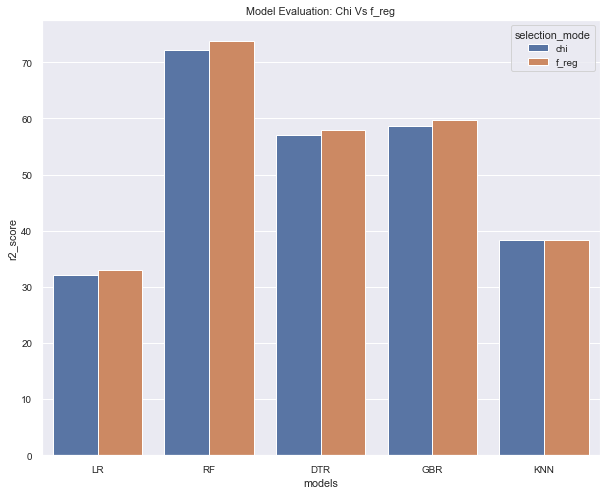

In [137]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['models'],y=df['r2_score'],hue=df['selection_mode'])
plt.title("Model Evaluation: Chi Vs f_reg")

Text(0.5, 1.0, 'Model Evaluation: f_regression Selection')

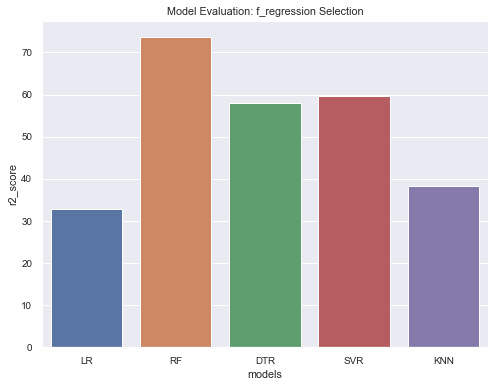

In [160]:
plt.figure(figsize=(8,6))
sns.barplot(x=f_reg_df['models'],y=f_reg_df['r2_score'])
plt.title("Model Evaluation: f_regression Selection")

In [150]:
X_train, X_test, y_train, y_test = train_test_split(f_reg_selected_X, y, test_size=0.2, random_state=3)

In [155]:
regressor=RandomForestRegressor()

In [156]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [157]:
input_data=[875.033098,493.272534,60.973565,26.119108,0,1,1,0,4,0.384862]

input_data_to_array=np.asarray(input_data)

input_data_reshaped=input_data_to_array.reshape(1,-1)

In [158]:
regressor.predict(input_data_reshaped)

array([212.5786915])

In [161]:
import joblib

joblib.dump(regressor,"airbnb_price_predictor.joblib")

['airbnb_price_predictor.joblib']